#The purpose of this Sprint

* Understanding linear regression through scratch
* Get used to object-oriented implementation
* Allow formulas to be incorporated into code

In [21]:
import numpy as np
import pandas as pd

class ScratchLinearRegression():  
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self, X):
        if self.no_bias != True:
            X = np.hstack([np.c_[np.ones(X.shape[0])],np.c_[X]]) 
        return X
        
    def fit(self, X, y, X_val=None, y_val=None):
        
        X = self._linear_hypothesis(X)
        y = np.resize(y,X.shape)
        
        X_mean = X.mean()
        y_mean = y.mean()
        
        part_1 = X-X_mean
        
        part_2 = y-y_mean
        
        covariance = np.sum(part_1 * part_2)
        variance = np.sum(part_1**2)
        
        # calculating the last values of the formula
        B1 = covariance/variance
        B0 = y_mean - np.multiply(B1,X_mean)
        
        self.B1 = B1
        self.B0 = B0
        self.coef_ = [self.B0,self.B0]
        self.n = len(X)
        
        if (X_val is not None) and (y_val is not None): 
            val_X = self._linear_hypothesis(X_val)
            val_y = np.resize(y_val,val_X.shape)

            val_X_mean = val_X.mean()
            val_y_mean = val_y.mean()
            
            val_part_1 = val_X-val_X_mean
            
            val_part_2 = val_y-val_y_mean

            val_covariance = np.sum(val_part_1 * val_part_2)
            val_variance = np.sum(val_part_1**2)

            # calculating the last values of the formula
            val_B1 = val_covariance/val_variance
            val_B0 = val_y_mean - np.multiply(val_B1,val_X_mean)

            self.val_B1 = val_B1
            self.val_B0 = val_B0
            self.val_X = val_X
            self.val_y = val_y
            # temp prediction for gradient descent
            self._gradient_descent(X, y)
        
        if self.verbose:
            #Outputs the learning process when is set to True
            print("loss {}, val loss {}".format(self.loss, self.val_loss))
        pass
        
    def predict(self, X):
        predictions = self.B0 + np.multiply(self.B1,X)
        self.y_pred = predictions
        pass
        return predictions
    
    
    def _gradient_descent(self, X, y):
        b1 = self.B1
        b0 = self.B0
        val_b1 = self.val_B1
        val_b0 = self.val_B0
        n = self.n
        
        for i in range(self.iter):
            temp_predictions = b0 - np.multiply(b1,X)
            error = y-temp_predictions
            val_temp_predictions = val_b0 - np.multiply(val_b1,self.val_X)
            val_error = self.val_y - val_temp_predictions
            
            # for train
            b1 = b1 - self.lr
            b0 = b0 - self.lr
            
            # for validation
            val_b1 = val_b1 - self.lr
            val_b0 = val_b0 - self.lr
            
            self.loss[i] = ((error)**2).mean()
            self.val_loss[i] = ((val_error)**2).mean()

#**[Problem1] Hypothetical function**

In [22]:
X0 = np.random.random_sample((20,5))
X1 = np.random.random_sample((20,5))
X = np.concatenate([X0,X1],axis=1)
X.shape

(20, 10)

In [23]:
y0 = np.random.random_sample((20,5))
y1 = np.random.random_sample((20,5))
y = np.concatenate([X0,X1],axis=1)
y.shape

(20, 10)

In [24]:
theta = np.random.random_sample(10)

np.dot(X,theta)

array([3.21741612, 2.36693774, 2.90500108, 3.28921393, 2.72349213,
       3.60099881, 2.71966034, 2.04429926, 1.91428815, 2.72493433,
       2.27854039, 2.41051665, 1.7571955 , 1.25147501, 3.24314432,
       2.58670725, 1.21385847, 2.366086  , 1.88313757, 3.11392675])

#**[Problem2] Steepest descent**

In [25]:
def _gradient_descent(self, X, y):
    b1 = self.B1
    b0 = self.B0
    val_b1 = self.val_B1
    val_b0 = self.val_B0
    n = self.n

    for i in range(self.iter):
        temp_predictions = b0 - np.multiply(b1,X)
        error = y-temp_predictions
        val_temp_predictions = val_b0 - np.multiply(val_b1,self.val_X)
        val_error = self.val_y - val_temp_predictions

        # for train
        b1 = b1 - self.lr
        b0 = b0 - self.lr

        # for validation
        val_b1 = val_b1 - self.lr
        val_b0 = val_b0 - self.lr

        self.loss[i] = ((error)**2).mean()
        self.val_loss[i] = ((val_error)**2).mean()

#**[Problem 3] Estimated**

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=10, lr=0.08, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)
y_pred

array([[0.09525271, 0.87564803, 0.07842672, 0.30151916, 0.8823051 ,
        0.94679081, 0.63267619, 0.22541606, 0.51320694, 0.12902127],
       [0.77785161, 0.74625266, 0.37161059, 0.80541612, 0.25051003,
        0.24909706, 0.04710704, 0.19457118, 0.18733496, 0.72389287],
       [0.98739003, 0.37503029, 0.86359705, 0.35001749, 0.7456054 ,
        0.91486455, 0.17267699, 0.93076677, 0.96515327, 0.48271157],
       [0.49707543, 0.72944066, 0.17325524, 0.54578023, 0.70768417,
        0.02604724, 0.0589229 , 0.44446323, 0.03731856, 0.53088618]])

In [27]:
# checking with the actual linear regression
from sklearn.linear_model import LinearRegression

l_regressor = LinearRegression()
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)
y_pred

array([[0.09525271, 0.87564803, 0.07842672, 0.30151916, 0.8823051 ,
        0.94679081, 0.63267619, 0.22541606, 0.51320694, 0.12902127],
       [0.77785161, 0.74625266, 0.37161059, 0.80541612, 0.25051003,
        0.24909706, 0.04710704, 0.19457118, 0.18733496, 0.72389287],
       [0.98739003, 0.37503029, 0.86359705, 0.35001749, 0.7456054 ,
        0.91486455, 0.17267699, 0.93076677, 0.96515327, 0.48271157],
       [0.49707543, 0.72944066, 0.17325524, 0.54578023, 0.70768417,
        0.02604724, 0.0589229 , 0.44446323, 0.03731856, 0.53088618]])

#**[Problem 4] Mean squared error**

* Create a function of mean square error (MSE) used as an index value for linear regression.

In [28]:
def MSE(y_pred, y):
    return np.mean((y_pred - y)**2)

print(MSE(y_test,y_pred))

4.23024794680134e-31


In [29]:
# checking with the actual MSE
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_test)

4.23024794680134e-31

#**[Problem 5] Objective function**

In [30]:
l_regressor = ScratchLinearRegression(num_iter=5000, lr=0.6, no_bias=True, verbose=True)
l_regressor.fit(X_train,y_train,X_test,y_test)

loss [1.43355439e+00 1.93651160e+00 2.66830579e+00 ... 2.85897362e+06
 2.86011762e+06 2.86126185e+06], val loss [1.34819119e+00 1.84266264e+00 2.59519512e+00 ... 3.22372042e+06
 3.22501044e+06 3.22630073e+06]


#**[Problem 6] Learning and estimation**

In [33]:
# loading the csv of the dataset
df = pd.read_csv('train.csv')
df = df.select_dtypes('number')

df.head()

# cleaning the dataset by filling the empy data(null)
cleaned_df = df.fillna(0)

# get only existing data with no missing values
cleaned_df = cleaned_df[cleaned_df.columns[~cleaned_df.isnull().all()]]

# separating them into variables
X = cleaned_df[['YearBuilt']].values
y = cleaned_df[['SalePrice']].values
y = y.reshape(-1)

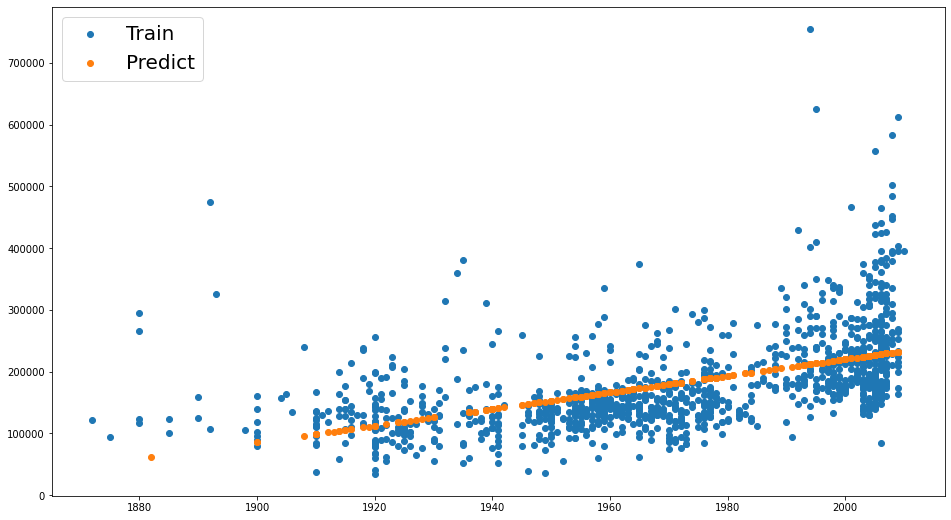

In [34]:
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=9, lr=0.0001, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train,X_test,y_test)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred,label="Predict")
plt.legend()
plt.plot();

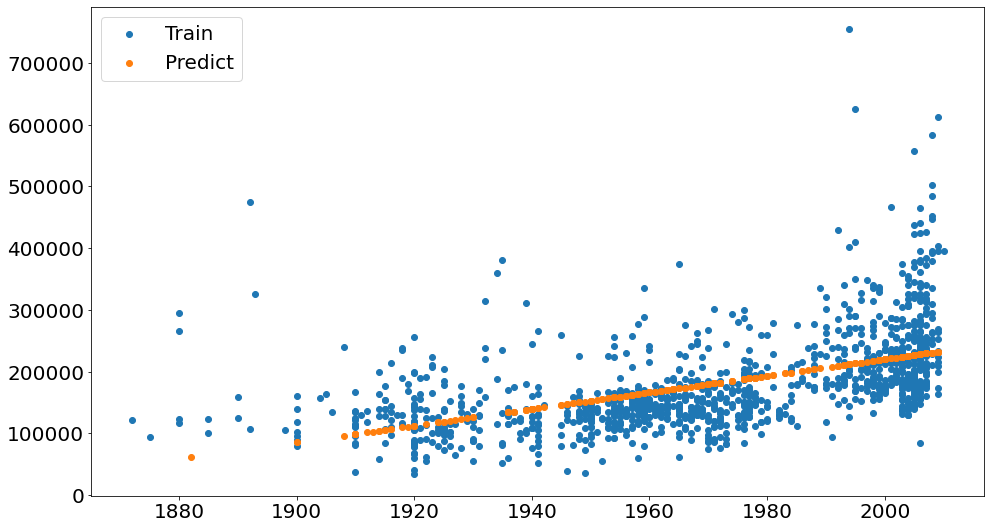

In [35]:
l_regressor_1 = LinearRegression()
l_regressor_1.fit(X_train,y_train)
y_pred_1 = l_regressor_1.predict(X_test)
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred_1,label="Predict")
plt.legend()
plt.plot();

#**[Problem 7] Learning curve plot**

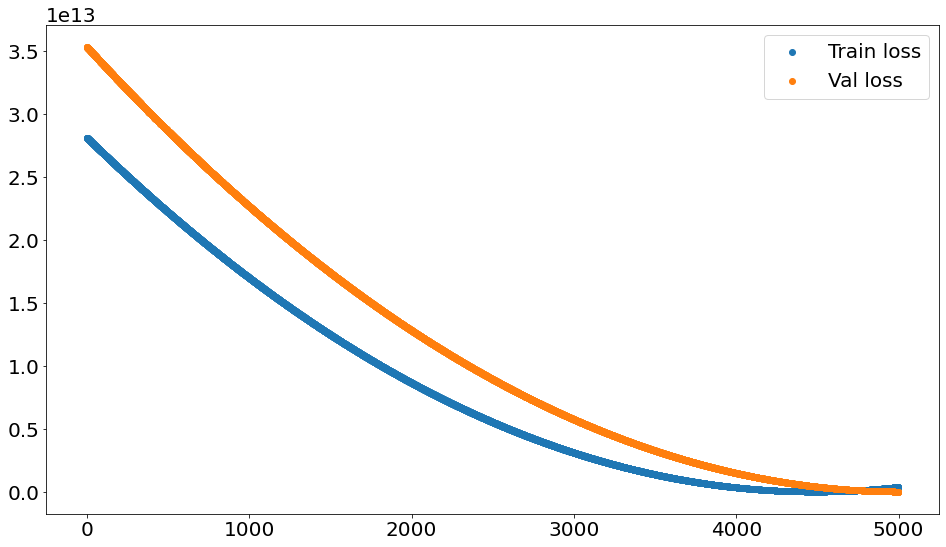

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=5000, lr=0.6, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train,X_test,y_test)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(l_regressor.loss)),l_regressor.loss,label='Train loss')
plt.scatter(range(len(l_regressor.val_loss)),l_regressor.val_loss,label='Val loss')
plt.legend()
plt.plot();

#**[Problem 8] (Advance task) Removal of bias term**

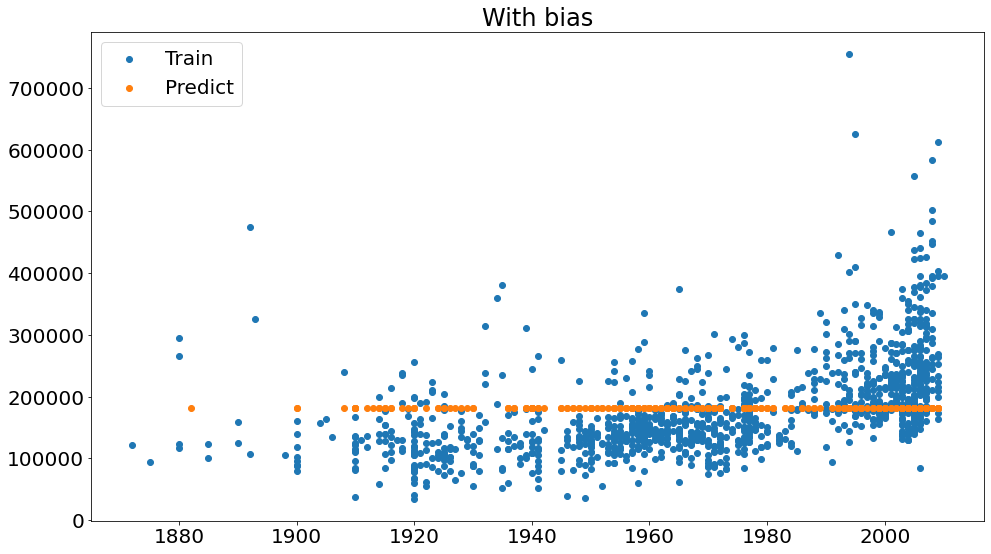

In [37]:
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=9, lr=0.0001, no_bias=False, verbose=False)
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(16,9))

plt.title("With bias")
plt.rcParams["font.size"] = 20
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred,label="Predict")
plt.legend()
plt.plot();

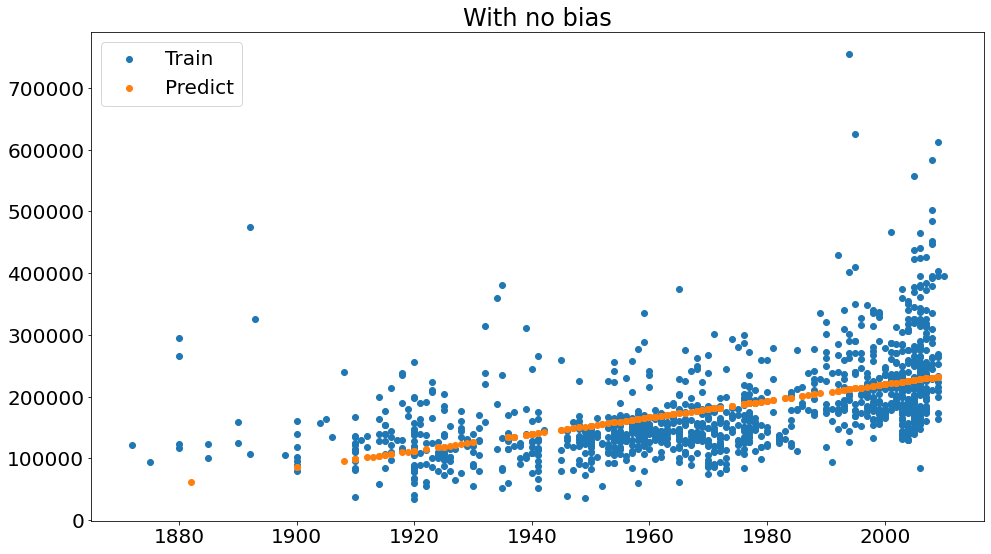

In [38]:
l_regressor = ScratchLinearRegression(num_iter=9, lr=0.0001, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(16,9))

plt.title("With no bias")
plt.rcParams["font.size"] = 20
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred,label="Predict")
plt.legend()
plt.plot();

The Bias affects the predictions

#**[Problem 9] (Advance task) Multidimensional feature quantity**

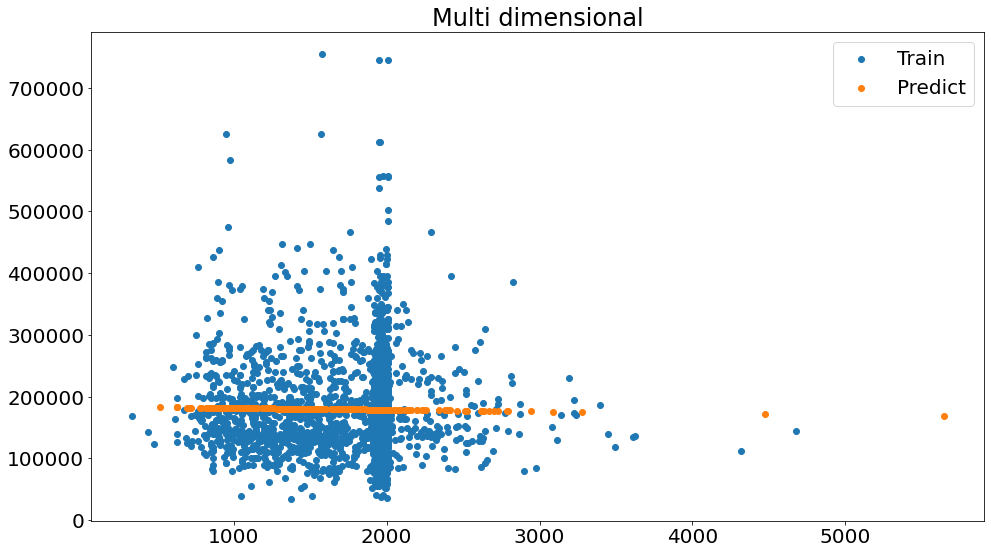

In [39]:
# separating them into variables
X = cleaned_df[['YearBuilt','GrLivArea']].values
y = cleaned_df[['SalePrice']].values
y = np.resize(y,X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=9, lr=0.0001, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(16,9))

plt.title("Multi dimensional")
plt.rcParams["font.size"] = 20
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred,label="Predict")
plt.legend()
plt.plot();

**when the square or cube of the feature is used for input The data are scattered in one place**

#**[Problem 10] (Advance task) Derivation of update formula**

**The equation is derived by** J(θ)=1/2mΣ(θx-y)^2 = 1/2mΣ((xθ)^2 -2yxθ +y^2)

**We then devide the derivatives** ΔJ(θ)/Δθ  **and**

**Then** = 1/2mΣ(2x^2θ -2yx) = 1/mΣ x(xθ -y)

#**[Problem 11] (Advance task) Problem of local optimum solution**

* It is possible to find the optimum solution, where gradient descent will be equal to zero but depending on what you are working with you might have many upward and downward and when you reach a low point doesn't necessarly mean you have the optimum solution

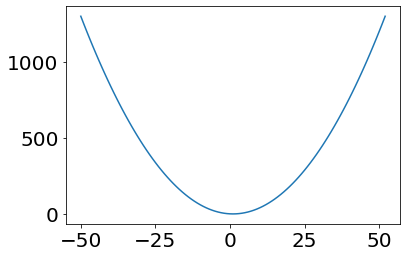

In [40]:
numbers = np.arange(-50,53,1)
equ = 1/2*(numbers-1)**2
plt.plot(numbers,equ);